# Exploratory Data Analysis - Payments Data

In [51]:
# Import libraries
import pandas as pd
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
import configparser
import matplotlib.pyplot as plt

## Connect to the postgres database

In [21]:
parser = configparser.ConfigParser()
parser.read('../bikeshareDW_cred.conf')
host = parser.get("postgres_creds","host")
user = parser.get("postgres_creds","user")
password = parser.get("postgres_creds","password")


In [27]:
sslmode = "require"
dbname = "udacityproject"
conn_string = "host={0} user={1} dbname={2} password={3} sslmode={4}".format(host, user, dbname, password, sslmode)
conn = psycopg2.connect(conn_string)
conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT);
print("Connection established")

cursor = conn.cursor()

Connection established


### Look at first 10 rows

In [35]:
cursor.execute("SELECT * FROM payment LIMIT 10;")
rows = cursor.fetchall()

# Print all rows

for row in rows:
    print(row)

(1, datetime.date(2019, 5, 1), '$9.00', 1000)
(2, datetime.date(2019, 6, 1), '$9.00', 1000)
(3, datetime.date(2019, 7, 1), '$9.00', 1000)
(4, datetime.date(2019, 8, 1), '$9.00', 1000)
(5, datetime.date(2019, 9, 1), '$9.00', 1000)
(6, datetime.date(2019, 10, 1), '$9.00', 1000)
(7, datetime.date(2019, 11, 1), '$9.00', 1000)
(8, datetime.date(2019, 12, 1), '$9.00', 1000)
(9, datetime.date(2020, 1, 1), '$9.00', 1000)
(10, datetime.date(2020, 2, 1), '$9.00', 1000)


### Count Rows

In [39]:
rowCount = cursor.execute("SELECT COUNT(*) FROM payment")
rowCount = cursor.fetchall()
print(rowCount)

[(1946607,)]


### Missing Values

In [61]:
dateNulls = cursor.execute("SELECT COUNT(*) FROM payment WHERE date IS NULL")
dateNulls = cursor.fetchall()
print(dateNulls)

amountNulls = cursor.execute("SELECT COUNT(*) FROM payment WHERE amount IS NULL")
amountNulls = cursor.fetchall()
print(amountNulls)

[(0,)]
[(0,)]


### Max/Min Date

In [45]:
maxMinDates = cursor.execute("SELECT MAX(date), MIN(date) FROM payment")
maxMinDates = cursor.fetchall()
print(maxMinDates)

[(datetime.date(2022, 2, 1), datetime.date(2013, 2, 1))]


#### Top 10 Payments by Date

In [49]:
top10Payments = cursor.execute("""
    SELECT date, SUM(amount) as amount
    FROM payment 
    GROUP BY date
    ORDER BY amount DESC 
    LIMIT 10;
""")
top10Payments = cursor.fetchall()
for row in top10Payments:
    print(row)


(datetime.date(2022, 2, 1), '$599,471.27')
(datetime.date(2022, 1, 1), '$590,499.18')
(datetime.date(2021, 12, 1), '$579,229.92')
(datetime.date(2021, 11, 1), '$566,140.61')
(datetime.date(2021, 10, 1), '$555,656.60')
(datetime.date(2021, 9, 1), '$540,993.53')
(datetime.date(2021, 8, 1), '$527,280.76')
(datetime.date(2021, 7, 1), '$513,013.67')
(datetime.date(2021, 6, 1), '$500,206.65')
(datetime.date(2021, 5, 1), '$485,719.25')


### Payments over Time

In [52]:
amountByDate = cursor.execute("""
    SELECT date, SUM(amount) as amount
    FROM payment
    GROUP BY date
    ORDER BY date
    """)
amountByDate = cursor.fetchall()

amountByDate = pd.DataFrame(amountByDate, columns=['date', 'amount'])


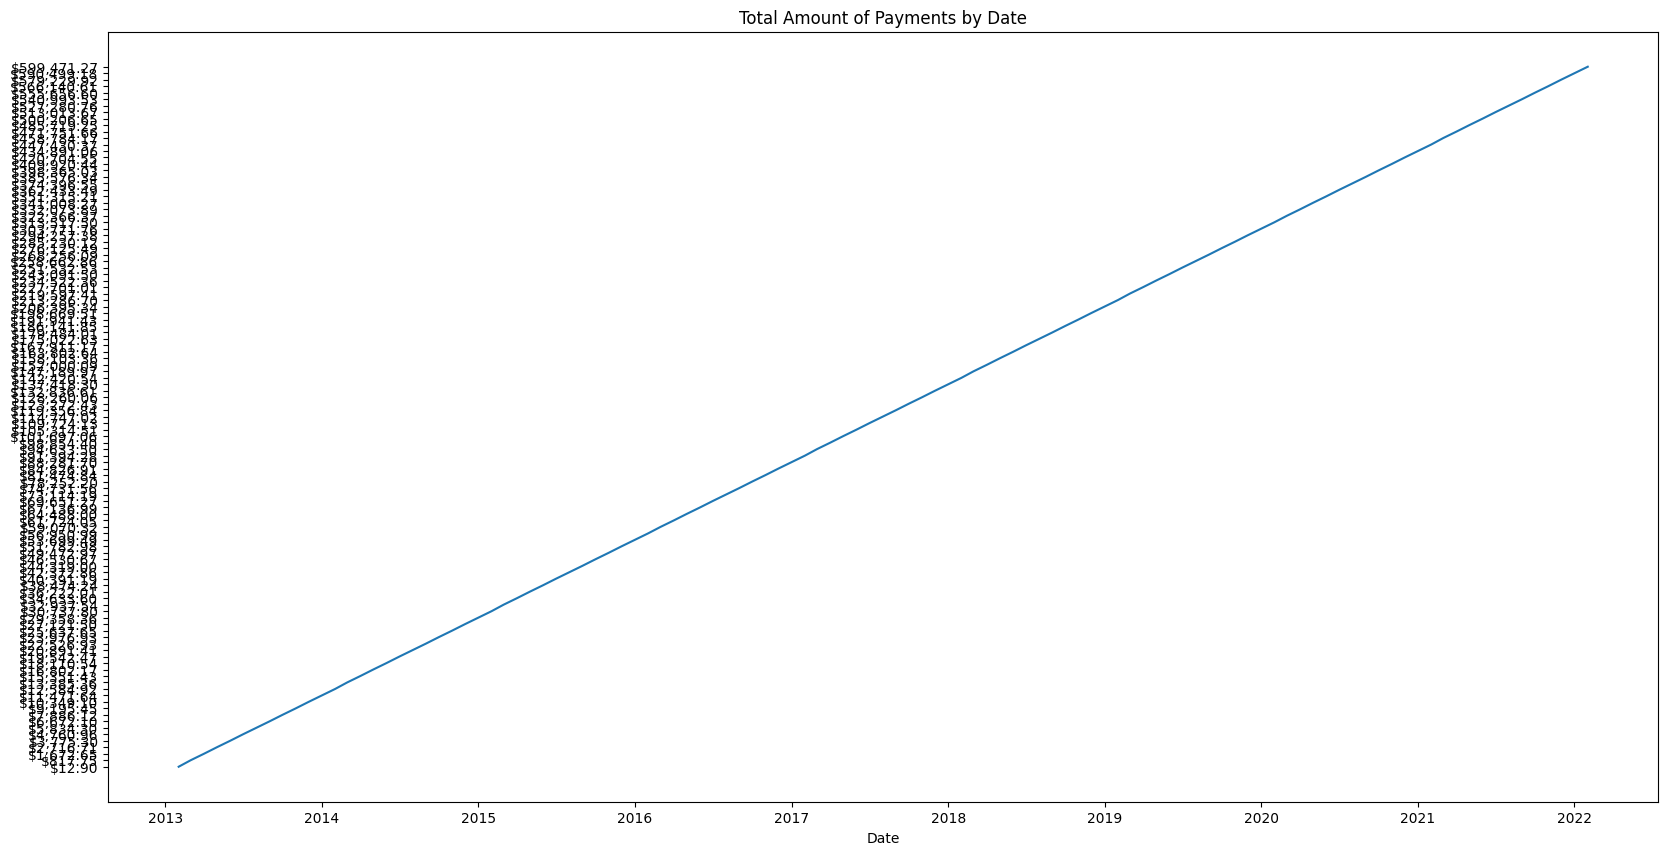

In [60]:
# Create a line chart using amountByDate
plt.figure(figsize=(20,10))
plt.plot(amountByDate['date'], amountByDate['amount'])
plt.title('Total Amount of Payments by Date')
plt.xlabel('Date')
plt.show()


In [26]:
# Disconnect
conn.commit()
cursor.close()
conn.close()